# Initialize Environment

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn dice-ml
!pip uninstall -y numpy pandas
!pip install numpy==1.24.4 pandas==1.5.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 111.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
# Load dataset
df = pd.read_csv("UCI_Credit_Card.csv")

# Drop ID column
df.drop(columns=["ID"], inplace=True)

# Rename target column for clarity
df.rename(columns={"default.payment.next.month": "default"}, inplace=True)

In [ ]:
len(df)

30000

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# Define continuous and categorical features
continuous_features = [
    'LIMIT_BAL', 'AGE',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]
categorical_features = [
    'SEX', 'EDUCATION', 'MARRIAGE',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
]

In [ ]:
# Define features and target
X = df.drop(columns=["default"])
y = df["default"]

In [ ]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Classifier

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create preprocessor for scaling continuous features only
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('cat', 'passthrough', categorical_features)
    ]
)

# Pipeline with preprocessor + logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Set up grid search on the pipeline's logistic regression step
param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear']  # liblinear supports both l1 and l2 penalties
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)

# Fit grid search (it will handle scaling internally)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_pipeline = grid_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best CV Accuracy: 0.8101666666666667


In [ ]:
y_pred = best_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.8101666666666667


## Confusion Matrix

Confusion Matrix:
 [[4552  135]
 [1004  309]]


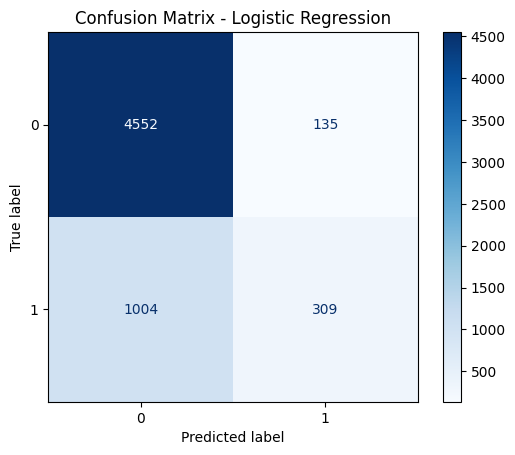

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print numeric confusion matrix
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipeline.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## Most important features

In [ ]:
# Get the classifier from the pipeline
log_reg = best_pipeline.named_steps['classifier']

# Get feature names
num_features = continuous_features
cat_features = categorical_features

# Combine all feature names after transformation
feature_names = num_features + cat_features

# Get coefficients
coefficients = log_reg.coef_[0]

# Create a DataFrame for easy sorting and interpretation
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'AbsCoefficient': np.abs(coefficients)
})

# Sort by absolute coefficient value
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Display top features
print(coef_df[['Feature', 'Coefficient']].head(10))

      Feature  Coefficient
17      PAY_0     0.576411
9    PAY_AMT2    -0.225579
2   BILL_AMT1    -0.219315
16   MARRIAGE    -0.162026
8    PAY_AMT1    -0.138851
14        SEX    -0.122955
0   LIMIT_BAL    -0.107723
15  EDUCATION    -0.101766
18      PAY_2     0.088915
1         AGE     0.072192


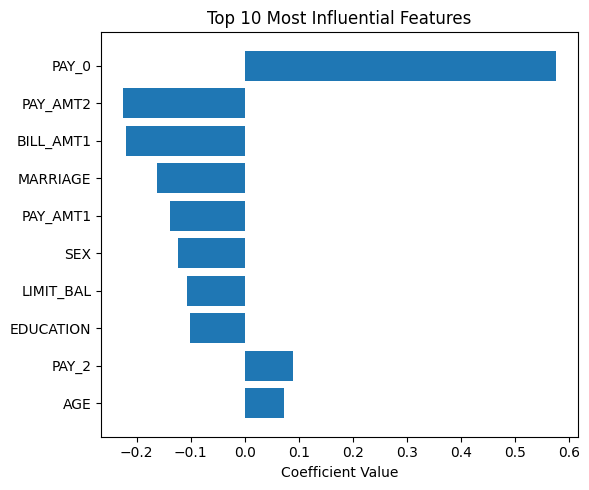

In [ ]:
top_n = 10
top_features = coef_df.head(top_n)

plt.figure(figsize=(6, 5))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Top 10 Most Influential Features")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Classification Report

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.70      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



# Fairness Analysis

## Dataset Counts

In [ ]:
protected_groups = {
    "SEX": {1: "Male", 2: "Female"},
    "EDUCATION": {1: "Graduate", 2: "University", 3: "High School", 4: "Others", 5: "Unknown", 6: "Unknown"},
    "MARRIAGE": {1: "Married", 2: "Single", 3: "Others"},
    "AGE_GROUP": {0: "<30", 1: ">=30"}  # Added age groups as binary categories
}

# Create AGE_GROUP column in X_test for fairness analysis
X_test = X_test.copy()  # To avoid SettingWithCopyWarning
X_test['AGE_GROUP'] = (X_test['AGE'] >= 30).astype(int)

In [ ]:
print("--- Counts by Sex ---")
sex_counts = X_test['SEX'].value_counts()
for sex_code, count in sex_counts.items():
    sex_name = protected_groups['SEX'].get(sex_code, f"Unknown({sex_code})")
    print(f"{sex_name}: {count}")

--- Counts by Sex ---
Female: 3594
Male: 2406


In [ ]:
# Count of samples in each age group
age_counts = X_test["AGE_GROUP"].value_counts().sort_index()

print("\n--- Counts by Age Group ---")
for val, label in protected_groups["AGE_GROUP"].items():
    count = age_counts.get(val, 0)
    print(f"{label}: {count}")


--- Counts by Age Group ---
<30: 1925
>=30: 4075


In [ ]:
print("\n--- Counts by Marriage Status ---")
marriage_counts = X_test['MARRIAGE'].value_counts()
for mar_code, count in marriage_counts.items():
    mar_name = protected_groups['MARRIAGE'].get(mar_code, f"Unknown({mar_code})")
    print(f"{mar_name}: {count}")


--- Counts by Marriage Status ---
Single: 3217
Married: 2717
Others: 57
Unknown(0): 9


In [ ]:
print("\n--- Counts by Education ---")
for edu_val, edu_name in protected_groups["EDUCATION"].items():
    count = (X_test['EDUCATION'] == edu_val).sum()
    print(f"{edu_name}: {count}")

# Also check if there are any unknown or unexpected values
unknown_count = (~X_test['EDUCATION'].isin(protected_groups["EDUCATION"].keys())).sum()
if unknown_count > 0:
    print(f"Unknown or unexpected EDUCATION values: {unknown_count}")


--- Counts by Education ---
Graduate: 2104
University: 2844
High School: 958
Others: 26
Unknown: 56
Unknown: 8
Unknown or unexpected EDUCATION values: 4


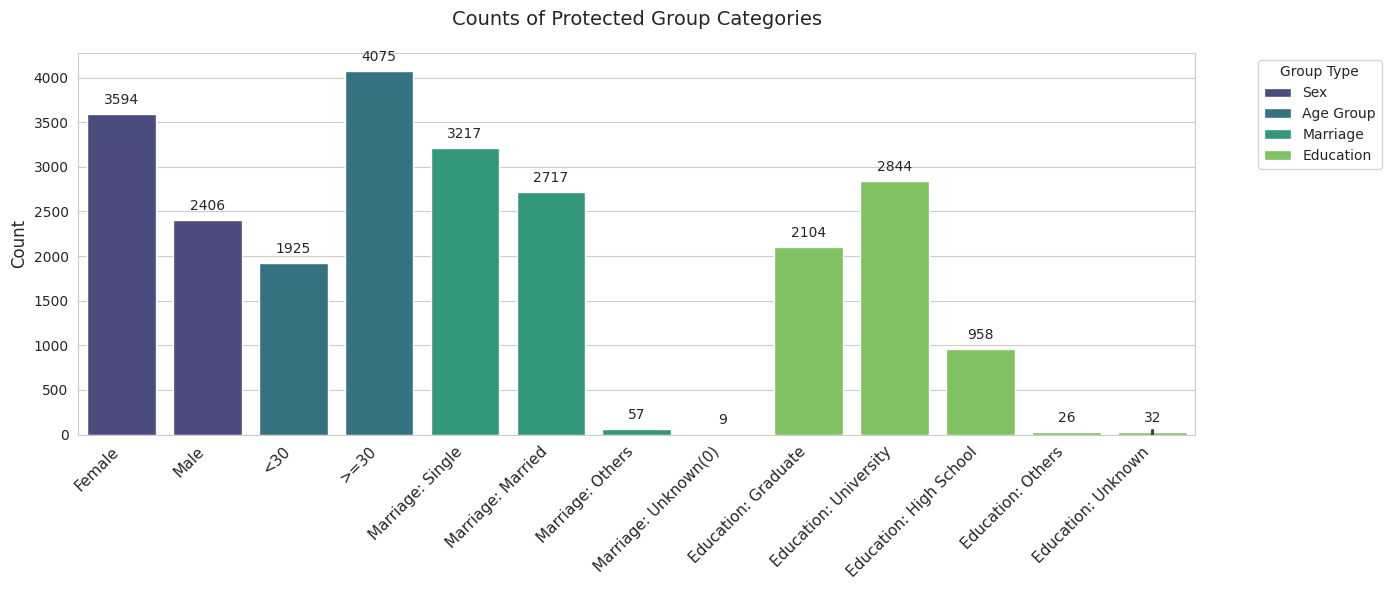

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data with unique category names
count_data = []

# Sex
sex_counts = X_test['SEX'].value_counts()
for sex_code, count in sex_counts.items():
    sex_name = protected_groups['SEX'].get(sex_code, f"Unknown({sex_code})")
    count_data.append({"Group": "Sex", "Category": sex_name, "Count": count})

# Age Group
age_counts = X_test["AGE_GROUP"].value_counts().sort_index()
for val, label in protected_groups["AGE_GROUP"].items():
    count = age_counts.get(val, 0)
    count_data.append({"Group": "Age Group", "Category": label, "Count": count})

# Marriage - Add prefix
marriage_counts = X_test['MARRIAGE'].value_counts()
for mar_code, count in marriage_counts.items():
    mar_name = protected_groups['MARRIAGE'].get(mar_code, f"Unknown({mar_code})")
    count_data.append({"Group": "Marriage", "Category": f"Marriage: {mar_name}", "Count": count})

# Education - Add prefix
for edu_val, edu_name in protected_groups["EDUCATION"].items():
    count = (X_test['EDUCATION'] == edu_val).sum()
    count_data.append({"Group": "Education", "Category": f"Education: {edu_name}", "Count": count})

# Convert to DataFrame
count_df = pd.DataFrame(count_data)

# Plot with adjusted spacing
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
ax = sns.barplot(
    data=count_df,
    x="Category", y="Count", hue="Group",
    dodge=False,
    palette="viridis"
)

# Customize
plt.title("Counts of Protected Group Categories", fontsize=14, pad=20)
plt.xlabel("")
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)

# Add count labels, skip zero-height bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{int(height)}",
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',  # label above the bar
                    xytext=(0, 5),             # offset by 5 points
                    textcoords='offset points',
                    fontsize=10)

# Improve legend
plt.legend(title="Group Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

/tmp/ipython-input-46-425462892.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


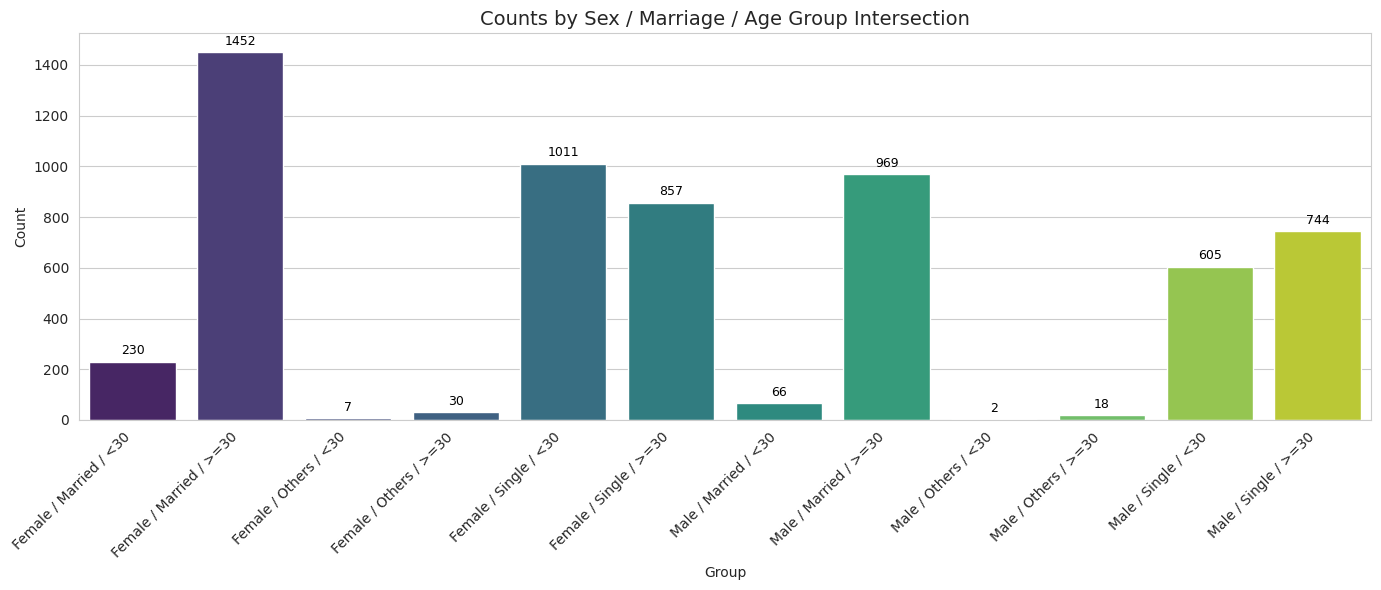

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X_test = X_test.copy()
X_test['AGE_GROUP'] = (X_test['AGE'] >= 30).astype(int)
X_test['SEX_LABEL'] = X_test['SEX'].map(protected_groups['SEX'])
X_test['MARRIAGE_LABEL'] = X_test['MARRIAGE'].map(protected_groups['MARRIAGE'])
X_test['AGE_LABEL'] = X_test['AGE_GROUP'].map(protected_groups['AGE_GROUP'])

intersection_counts = X_test.groupby(
    ['SEX_LABEL', 'MARRIAGE_LABEL', 'AGE_LABEL']
).size().reset_index(name='Count')

intersection_counts['Group'] = (
    intersection_counts['SEX_LABEL'] + " / " +
    intersection_counts['MARRIAGE_LABEL'] + " / " +
    intersection_counts['AGE_LABEL']
)

plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
ax = sns.barplot(
    data=intersection_counts,
    x='Group', y='Count',
    palette="viridis"
)

plt.title("Counts by Sex / Marriage / Age Group Intersection", fontsize=14)
plt.ylabel("Count")
plt.xlabel("Group")
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{int(height)}",
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        fontsize=9, color='black',
        xytext=(0, 3),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

## Fairness Metrics

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def calculate_fairness_metrics(y_true, y_pred, group_mask):
    # Handle edge cases where predictions are all 0 or 1
    cm = confusion_matrix(y_true[group_mask], y_pred[group_mask], labels=[0, 1])
    if cm.size == 1:  # Only one class predicted
        if y_pred[group_mask][0] == 0:
            tn, fp, fn, tp = cm[0, 0], 0, 0, 0
        else:
            tn, fp, fn, tp = 0, 0, 0, cm[0, 0]
    else:
        tn, fp, fn, tp = cm.ravel()

    # Calculate rates
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate (Sensitivity)
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0  # True Negative Rate (Specificity)
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0  # False Negative Rate
    statistical_parity = (tp + fp) / len(y_true[group_mask]) if len(y_true[group_mask]) > 0 else 0  # Positive Prediction Rate

    return {
        "TPR": tpr, "TNR": tnr,
        "FPR": fpr, "FNR": fnr,
        "Statistical_Parity": statistical_parity
    }

# Calculate overall performance metrics
print("--- Overall Performance ---")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score : {f1_score(y_test, y_pred):.3f}\n")

# Compare all protected groups (including age groups)
for feature, group_map in protected_groups.items():
    print(f"\n--- Fairness Analysis for {feature} ---")
    # base group still needed for DI calculation
    base_group = list(group_map.keys())[0]
    base_mask = (X_test[feature] == base_group)
    base_metrics = calculate_fairness_metrics(y_test, y_pred, base_mask)

    for group_val, group_name in group_map.items():
        group_mask = (X_test[feature] == group_val)
        if sum(group_mask) == 0:
            continue
        metrics = calculate_fairness_metrics(y_test, y_pred, group_mask)

        di_ratio = metrics["Statistical_Parity"] / base_metrics["Statistical_Parity"] if base_metrics["Statistical_Parity"] > 0 else np.nan

        print(f"\nGroup {group_name} ({feature}={group_val}):")
        print(f"- TPR (Sensitivity): {metrics['TPR']:.3f}")
        print(f"- TNR (Specificity): {metrics['TNR']:.3f}")
        print(f"- FPR: {metrics['FPR']:.3f}")
        print(f"- FNR: {metrics['FNR']:.3f}")
        print(f"- Statistical Parity: {metrics['Statistical_Parity']:.3f}")
        print(f"- Disparate Impact (DI): {di_ratio:.3f}")

--- Overall Performance ---
Accuracy : 0.810
Precision: 0.696
Recall   : 0.235
F1 Score : 0.352


--- Fairness Analysis for SEX ---

Group Male (SEX=1):
- TPR (Sensitivity): 0.250
- TNR (Specificity): 0.963
- FPR: 0.037
- FNR: 0.750
- Statistical Parity: 0.086
- Disparate Impact (DI): 1.000

Group Female (SEX=2):
- TPR (Sensitivity): 0.224
- TNR (Specificity): 0.976
- FPR: 0.024
- FNR: 0.776
- Statistical Parity: 0.066
- Disparate Impact (DI): 0.760

--- Fairness Analysis for EDUCATION ---

Group Graduate (EDUCATION=1):
- TPR (Sensitivity): 0.191
- TNR (Specificity): 0.982
- FPR: 0.018
- FNR: 0.809
- Statistical Parity: 0.053
- Disparate Impact (DI): 1.000

Group University (EDUCATION=2):
- TPR (Sensitivity): 0.257
- TNR (Specificity): 0.965
- FPR: 0.035
- FNR: 0.743
- Statistical Parity: 0.085
- Disparate Impact (DI): 1.613

Group High School (EDUCATION=3):
- TPR (Sensitivity): 0.259
- TNR (Specificity): 0.962
- FPR: 0.038
- FNR: 0.741
- Statistical Parity: 0.094
- Disparate Impact (D

### Gender

/tmp/ipython-input-48-1236710345.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([metric_labels[m] for m in metric_order], rotation=45, ha='right')


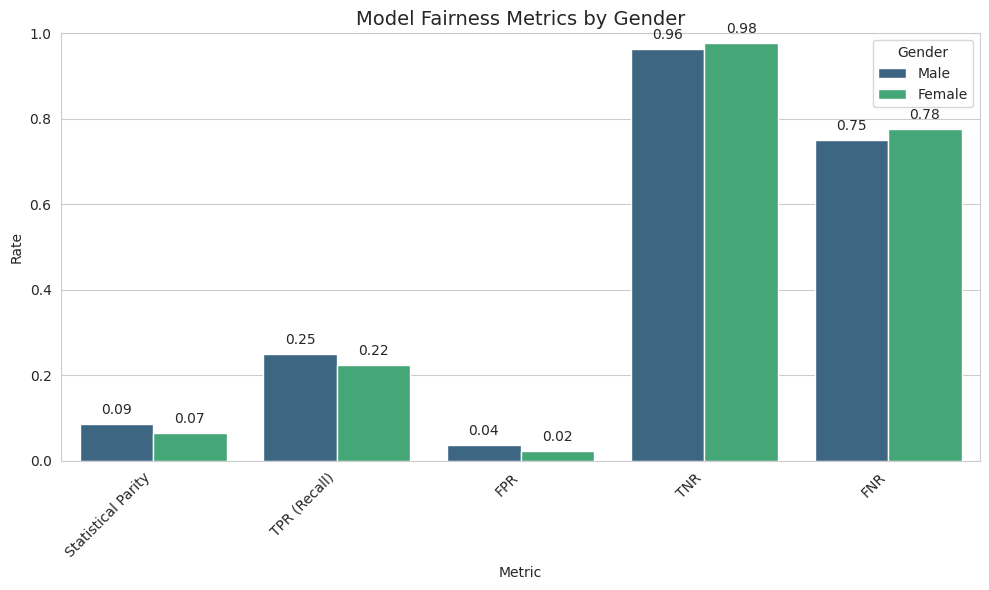

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate metrics by sex
sex_metrics = []
for sex_val, sex_name in protected_groups["SEX"].items():
    mask = (X_test["SEX"] == sex_val)
    metrics = calculate_fairness_metrics(y_test, y_pred, mask)
    metrics["SEX"] = sex_name
    sex_metrics.append(metrics)

sex_df = pd.DataFrame(sex_metrics)

# Define metric order and display labels
metric_order = ["Statistical_Parity", "TPR", "FPR", "TNR", "FNR"]
metric_labels = {
    "Statistical_Parity": "Statistical Parity",
    "TPR": "TPR (Recall)",
    "FPR": "FPR",
    "TNR": "TNR",
    "FNR": "FNR"
}

# Melt dataframe and explicitly set variable as categorical to avoid spacing issue
melted_df = pd.melt(sex_df, id_vars=["SEX"], value_vars=metric_order)
melted_df["variable"] = pd.Categorical(melted_df["variable"], categories=metric_order, ordered=True)

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=pd.melt(sex_df, id_vars=["SEX"], value_vars=metric_order),
    x="variable",
    y="value",
    hue="SEX",
    order=metric_order,
    palette="viridis"
)

# Customize axis labels and ticks
ax.set_title("Model Fairness Metrics by Gender", fontsize=14)
ax.set_ylabel("Rate")
ax.set_xlabel("Metric")
ax.set_ylim(0, 1)
ax.set_xticklabels([metric_labels[m] for m in metric_order], rotation=45, ha='right')
plt.legend(title="Gender")

# Annotate values on bars
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        ax.annotate(
            f"{height:.2f}",
            (p.get_x() + p.get_width() / 2., height),
            ha='center',
            va='bottom',
            xytext=(0, 5),
            textcoords='offset points'
        )

plt.tight_layout()
plt.show()

### Marital Status

/tmp/ipython-input-28-594484148.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([metric_labels[m] for m in metric_order], rotation=45, ha='right')


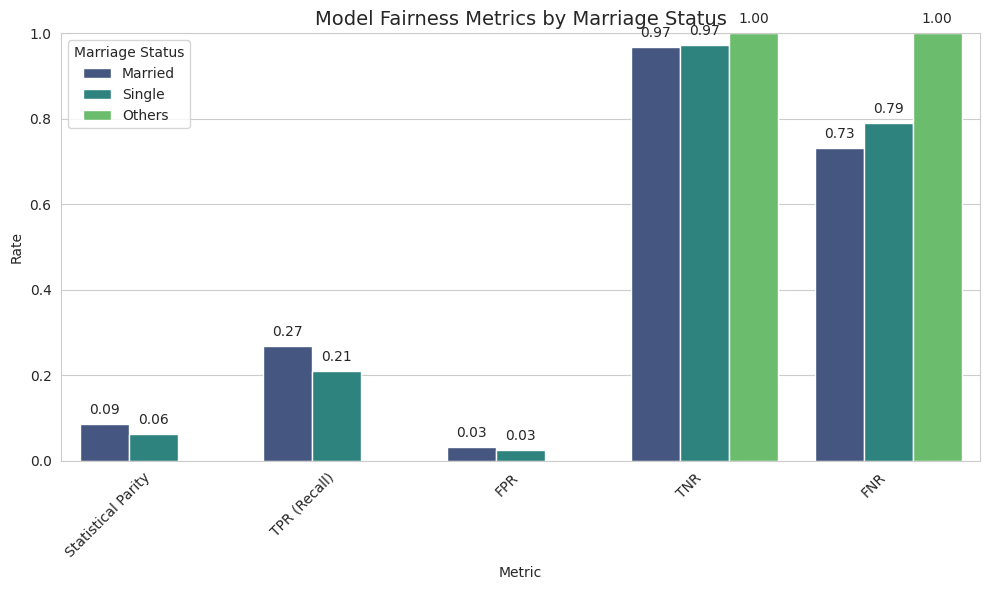

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate metrics by marriage group
marriage_metrics = []
for val, name in protected_groups["MARRIAGE"].items():
    mask = (X_test["MARRIAGE"] == val)
    if mask.sum() == 0:
        continue  # Skip if no samples
    metrics = calculate_fairness_metrics(y_test, y_pred, mask)
    metrics["MARRIAGE"] = name
    marriage_metrics.append(metrics)

marriage_df = pd.DataFrame(marriage_metrics)

# Define metric order and labels
metric_order = ["Statistical_Parity", "TPR", "FPR", "TNR", "FNR"]
metric_labels = {
    "Statistical_Parity": "Statistical Parity",
    "TPR": "TPR (Recall)",
    "FPR": "FPR",
    "TNR": "TNR",
    "FNR": "FNR"
}

# Melt and fix category ordering
melted_df = pd.melt(marriage_df, id_vars=["MARRIAGE"], value_vars=metric_order)
melted_df["variable"] = pd.Categorical(melted_df["variable"], categories=metric_order, ordered=True)

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.barplot(
    data=melted_df,
    x="variable",
    y="value",
    hue="MARRIAGE",
    palette="viridis"
)

# Customize axis labels and ticks
ax.set_title("Model Fairness Metrics by Marriage Status", fontsize=14)
ax.set_ylabel("Rate")
ax.set_xlabel("Metric")
ax.set_ylim(0, 1)
ax.set_xticklabels([metric_labels[m] for m in metric_order], rotation=45, ha='right')
plt.legend(title="Marriage Status")

# Annotate bars
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        ax.annotate(
            f"{height:.2f}",
            (p.get_x() + p.get_width() / 2., height),
            ha='center',
            va='bottom',
            xytext=(0, 5),
            textcoords='offset points'
        )

plt.tight_layout()
plt.show()

### Age

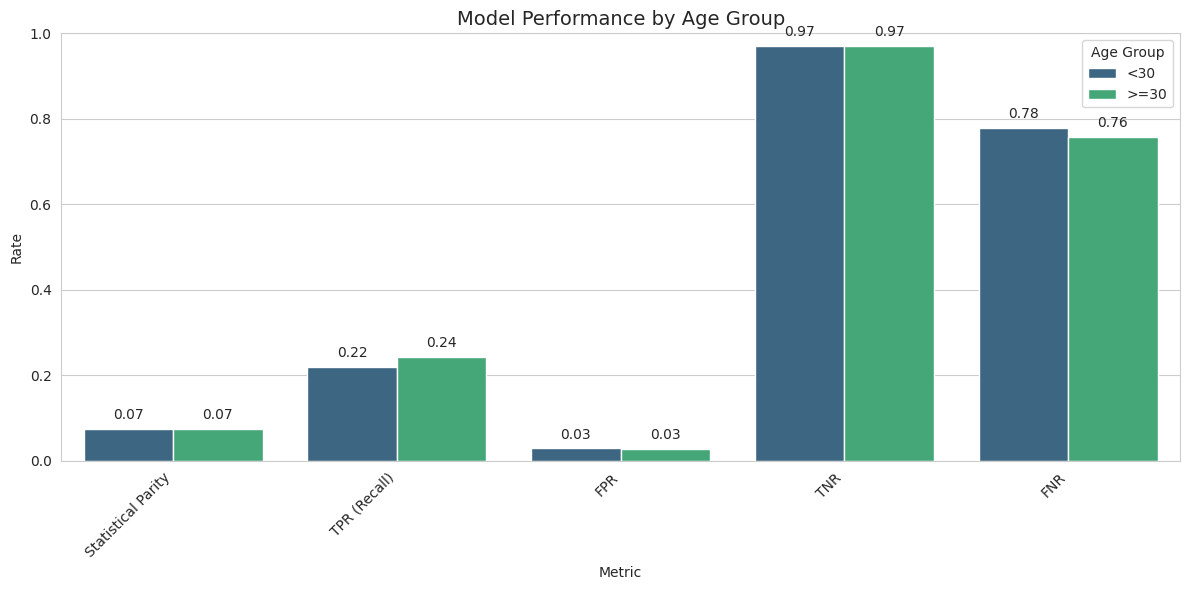

In [ ]:
# Calculate metrics by age group
age_metrics = []
for age_val, age_label in protected_groups["AGE_GROUP"].items():
    mask = (X_test["AGE_GROUP"] == age_val)
    metrics = calculate_fairness_metrics(y_test, y_pred, mask)
    metrics["AGE_GROUP"] = age_label
    age_metrics.append(metrics)

age_df = pd.DataFrame(age_metrics)

# Define metric order and labels
metric_order = ["Statistical_Parity", "TPR", "FPR", "TNR", "FNR"]
metric_labels = ["Statistical Parity", "TPR (Recall)", "FPR", "TNR", "FNR"]

# Plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
ax = sns.barplot(
    data=pd.melt(age_df, id_vars=["AGE_GROUP"], value_vars=metric_order),
    x="variable",
    y="value",
    hue="AGE_GROUP",
    order=metric_order,
    palette="viridis"
)

# Customize plot
plt.title("Model Performance by Age Group", fontsize=14)
plt.ylabel("Rate")
plt.xlabel("Metric")
plt.ylim(0, 1)
plt.xticks(range(5), metric_labels, rotation=45, ha='right')
plt.legend(title="Age Group")

# Add value labels only for visible bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f"{height:.2f}",
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='center',
            xytext=(0, 10),
            textcoords='offset points'
        )

plt.tight_layout()
plt.show()

### Z-statistic

#### Statistical Parity

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Mask groups
male_mask = X_test["SEX"] == 1
female_mask = X_test["SEX"] == 2

# Positive predictions in each group
male_positive = y_pred[male_mask].sum()
female_positive = y_pred[female_mask].sum()

# Total in each group
n_male = male_mask.sum()
n_female = female_mask.sum()

# Perform z-test
count = [male_positive, female_positive]
nobs = [n_male, n_female]

z_stat, p_value = proportions_ztest(count, nobs)
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.4f}")

Z-statistic: 3.014
P-value: 0.0026


#### TPR

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Count true positives in each group
tp_male = ((y_pred == 1) & (y_test == 1) & (male_mask)).sum()
tp_female = ((y_pred == 1) & (y_test == 1) & (female_mask)).sum()

# Count total actual positives in each group
pos_male = ((y_test == 1) & male_mask).sum()
pos_female = ((y_test == 1) & female_mask).sum()

# Z-test on TPRs
count = [tp_male, tp_female]
nobs = [pos_male, pos_female]

z_stat, p_value = proportions_ztest(count, nobs)
print(f"Z-statistic: {z_stat:.3f}, p-value: {p_value:.5f}")

Z-statistic: 1.080, p-value: 0.28015


#### FPR

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Count false positives
fp_male = ((y_pred == 1) & (y_test == 0) & (male_mask)).sum()
fp_female = ((y_pred == 1) & (y_test == 0) & (female_mask)).sum()

# Count actual negatives
neg_male = ((y_test == 0) & (male_mask)).sum()
neg_female = ((y_test == 0) & (female_mask)).sum()

# Perform z-test
count = [fp_male, fp_female]
nobs = [neg_male, neg_female]

z_stat_fpr, p_value_fpr = proportions_ztest(count, nobs)

print(f"Z-statistic (FPR): {z_stat_fpr:.3f}, p-value: {p_value_fpr:.5f}")

Z-statistic (FPR): 2.651, p-value: 0.00803


#### TNR

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Count TNs
tn_male = ((y_pred == 0) & (y_test == 0) & (male_mask)).sum()
tn_female = ((y_pred == 0) & (y_test == 0) & (female_mask)).sum()

# Count total negatives
neg_male = ((y_test == 0) & (male_mask)).sum()
neg_female = ((y_test == 0) & (female_mask)).sum()

# Z-test for proportion difference in TNR
count = [tn_male, tn_female]
nobs = [neg_male, neg_female]

z_stat, p_value = proportions_ztest(count, nobs)

print(f"Z-statistic (TNR): {z_stat:.3f}, p-value: {p_value:.5f}")

Z-statistic (TNR): -2.651, p-value: 0.00803


#### FNR

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Count TNs
fn_male = ((y_pred == 0) & (y_test == 1) & (male_mask)).sum()
fn_female = ((y_pred == 0) & (y_test == 1) & (female_mask)).sum()

# Count total actual positives in each group
pos_male = ((y_test == 1) & male_mask).sum()
pos_female = ((y_test == 1) & female_mask).sum()

# Z-test for FNR comparison (i.e., error rate among positives)
count = [fn_male, fn_female]
nobs = [pos_male, pos_female]

z_stat, p_value = proportions_ztest(count, nobs)

print(f"Z-statistic (FNR): {z_stat:.3f}, p-value: {p_value:.5f}")

Z-statistic (FNR): -1.080, p-value: 0.28015


In [ ]:
X_test.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AGE_GROUP',
       'SEX_LABEL', 'MARRIAGE_LABEL', 'AGE_LABEL'],
      dtype='object')

In [ ]:
X_test = X_test.drop(columns=['AGE_GROUP', 'SEX_LABEL', 'MARRIAGE_LABEL', 'AGE_LABEL'], errors='ignore')

In [ ]:
X_test.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

# Generate Counterfactuals

In [ ]:
import dice_ml
from dice_ml import Dice

## Setup

In [ ]:
# Define feature types
continuous_features = ['LIMIT_BAL', 'AGE',
                       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
outcome_name = 'default'

# Define immutable features for the counterfactual analysis
immutable_features = ["SEX", "MARRIAGE", "AGE"]

In [ ]:
print(df[continuous_features].dtypes)

LIMIT_BAL    float64
AGE            int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
dtype: object


In [ ]:
print(df[categorical_features].dtypes)

SEX          int64
EDUCATION    int64
MARRIAGE     int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
dtype: object


In [ ]:
# Convert categorical features to strings in the DataFrame
df[categorical_features] = df[categorical_features].astype(str) # ADDED

# Reinitialize DiCE data
dice_data = dice_ml.Data(
    dataframe=df,
    continuous_features=continuous_features,
    categorical_features=categorical_features,
    outcome_name=outcome_name,
    immutable_features=immutable_features
)

# Define DiCE model using the trained pipeline
dice_model = dice_ml.Model(model=best_pipeline, backend="sklearn")

# Initialize DiCE explainer
dice_exp = Dice(dice_data, dice_model, method="random")

In [ ]:
# Count default predictions (class=1)
num_defaults = sum(y_pred == 1)
total_instances = len(y_pred)

print(f"Number of instances predicted to default: {num_defaults} (out of {total_instances}, {num_defaults/total_instances:.1%})")

Number of instances predicted to default: 444 (out of 6000, 7.4%)


In [ ]:
# Boolean mask for predicted defaults
default_mask = (y_pred == 1)

# Filter your feature data for defaults
X_defaults = X_test[default_mask]

# Count how many males and females in defaults
num_males = (X_defaults['SEX'] == 1).sum()
num_females = (X_defaults['SEX'] == 2).sum()
total_defaults = len(X_defaults)

print(f"Number of instances predicted to default: {total_defaults} (out of {len(y_pred)}, {total_defaults/len(y_pred):.1%})")
print(f"  - Males: {num_males} ({num_males/total_defaults:.1%})")
print(f"  - Females: {num_females} ({num_females/total_defaults:.1%})")

Number of instances predicted to default: 444 (out of 6000, 7.4%)
  - Males: 208 (46.8%)
  - Females: 236 (53.2%)


## Effort Modeling

In [ ]:
# Counterfactual config
features_to_vary = ['LIMIT_BAL', 'EDUCATION',
                    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

feature_ranges = {
    "LIMIT_BAL": [1000, 1000000],        # Credit limit in NT dollars

    "EDUCATION": ['0', '1', '2', '3', '4', '5', '6'],

    # PAY_* features: Repayment status
    "PAY_0": ['-2', '-1', '0', '1', '2', '3', '4', '5', '7', '8'],
    "PAY_2": ['-2', '-1', '0', '1', '2', '3', '4', '6', '7'],
    "PAY_3": ['-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8'],
    "PAY_4": ['-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7'],
    "PAY_5": ['-2', '-1', '0', '2', '3', '4', '5', '6', '7'],
    "PAY_6": ['-2', '-1', '0', '2', '3', '4', '5', '6', '7'],

    # BILL_AMT* (amount of bill statement in NT dollars)
    "BILL_AMT1": [0, 1000000],
    "BILL_AMT2": [0, 1000000],
    "BILL_AMT3": [0, 1000000],
    "BILL_AMT4": [0, 1000000],
    "BILL_AMT5": [0, 1000000],
    "BILL_AMT6": [0, 1000000],

    # PAY_AMT* (amount of previous payment)
    "PAY_AMT1": [0, 100000],
    "PAY_AMT2": [0, 100000],
    "PAY_AMT3": [0, 100000],
    "PAY_AMT4": [0, 100000],
    "PAY_AMT5": [0, 100000],
    "PAY_AMT6": [0, 100000],
}

In [ ]:
effort_costs = {
    # Actionable features with higher costs
    "LIMIT_BAL": 1.0,  # Cost per unit increase in credit limit
    "EDUCATION": 1.0,     # High cost per level change
    "PAY_0": 1.0, "PAY_2": 1.0, "PAY_3": 1.0, "PAY_4": 1.0, "PAY_5": 1.0, "PAY_6": 1.0, # High cost for improving payment status

    # Less actionable features with very low costs
    "BILL_AMT1": 1.0, "BILL_AMT2": 1.0, "BILL_AMT3": 1.0, "BILL_AMT4": 1.0, "BILL_AMT5": 1.0, "BILL_AMT6": 1.0,
    "PAY_AMT1": 1.0, "PAY_AMT2": 1.0, "PAY_AMT3": 1.0, "PAY_AMT4": 1.0, "PAY_AMT5": 1.0, "PAY_AMT6": 1.0
}

def calculate_normalized_effort(original_instance, cf_instance, cost_dict, scaler=None):
    """Calculates effort with explicit handling of categorical vs. continuous features."""
    total_effort = 0
    feature_efforts = {}

    for feature in cost_dict:
        original_val = original_instance[feature]
        cf_val = cf_instance[feature]

        # --- Continuous Features (use scaling) ---
        if feature in continuous_features and scaler and feature in scaler.feature_names_in_:
            mean = scaler.mean_[scaler.feature_names_in_ == feature][0]
            scale = scaler.scale_[scaler.feature_names_in_ == feature][0]
            scaled_diff = abs((original_val - mean)/scale - (cf_val - mean)/scale)
            effort = cost_dict[feature] * scaled_diff

        # --- Categorical Features (binary/ordinal) ---
        elif feature in categorical_features:
            # Convert string categories to integers before subtraction
            try:
                original_val = int(original_val)
                cf_val = int(cf_val)
                effort = cost_dict[feature] * abs(original_val - cf_val)
            except:
                print("conversion failed")
                # If conversion fails, assume binary cost
                effort = cost_dict[feature] if original_val != cf_val else 0

        # --- Fallback (unexpected features) ---
        else:
            effort = cost_dict[feature] * abs(original_val - cf_val)

        feature_efforts[feature] = effort
        total_effort += effort

    return total_effort, feature_efforts

# One run with all 444 instances that were predicted as default

In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict
import random
import seaborn as sns
import matplotlib.pyplot as plt

# --- Configuration ---
NUM_RUNS = 1
group_effort_runs = defaultdict(list)
results_list = []

# --- Multiple Runs ---
for run in range(NUM_RUNS):
    print(f"Run {run+1}/{NUM_RUNS}")

    np.random.seed(run)
    random.seed(run)

    # --- Main Counterfactual Generation Loop ---

    # Identify denied applicants from the test set
    denied_mask = (y_pred == 1)

    X_sampled = X_test[denied_mask].copy()  # Create an independent copy

    print(f"Generating counterfactuals for {len(X_sampled)} sampled instances...")

    # Before generating counterfactuals, ensure all features have consistent types
    for col in X_sampled.columns:
        X_sampled[col] = X_sampled[col].astype(df[col].dtype)  # Convert all to float for numerical operations

    # Then modify your main loop:
    for idx, instance in X_sampled.iterrows():
        try:
            cfs = dice_exp.generate_counterfactuals(
                query_instances=instance.to_frame().T,
                total_CFs=1,
                desired_class="opposite",
                features_to_vary=features_to_vary, # ADDED
                permitted_range=feature_ranges # ADDED
            )
            cf_df = cfs.cf_examples_list[0].final_cfs_df

            if cf_df is not None and not cf_df.empty:
                # Use the scaler from your preprocessing pipeline
                min_effort, feature_efforts = calculate_normalized_effort(
                    instance,
                    cf_df.iloc[0],
                    effort_costs,
                    scaler=best_pipeline.named_steps['preprocessor'].transformers_[0][1],  # Get the StandardScaler
                )

                if min_effort != float('inf'):
                    sex_label = 'Male' if instance['SEX'] == 1 else 'Female'
                    age_label = '>=30' if instance['AGE'] >= 30 else '<30'
                    marriage_label = 'Married' if instance['MARRIAGE'] == 1 else 'Not Married'
                    group_label = f"{sex_label} | {age_label} | {marriage_label}"

                    # Total effort aggregation
                    group_effort_runs[group_label].append(min_effort)

                    # Per-feature effort aggregation
                    results_list.append({
                        'SEX': sex_label,
                        'AGE_GROUP': age_label,
                        'MARRIAGE_GROUP': marriage_label,
                        'feature_efforts': feature_efforts
                    })
        except Exception as e:
            print(f"Run {run+1}, instance {idx}: {e}")

Run 1/1
Generating counterfactuals for 444 sampled instances...


100%|██████████| 1/1 [00:00<00:00,  2.46it/s]


## Subgroups

In [ ]:
# --- Summary Table: Total Effort by Group ---
group_effort_summary = pd.DataFrame([
    {
        'Group': group,
        'Mean Effort': np.mean(efforts),
        'Std Effort': np.std(efforts),
        'Count': len(efforts)
    }
    for group, efforts in group_effort_runs.items()
])
print(group_effort_summary)

                         Group  Mean Effort  Std Effort  Count
0      Female | >=30 | Married     7.856232    4.520535    116
1         Male | <30 | Married     7.791767    4.997619      9
2        Male | >=30 | Married     6.823604    3.997286     87
3    Male | >=30 | Not Married     7.792196    4.590234     60
4     Male | <30 | Not Married     7.875224    3.029033     52
5   Female | <30 | Not Married     7.933713    5.167467     56
6  Female | >=30 | Not Married     7.250880    4.809407     39
7       Female | <30 | Married     7.741040    4.531061     25


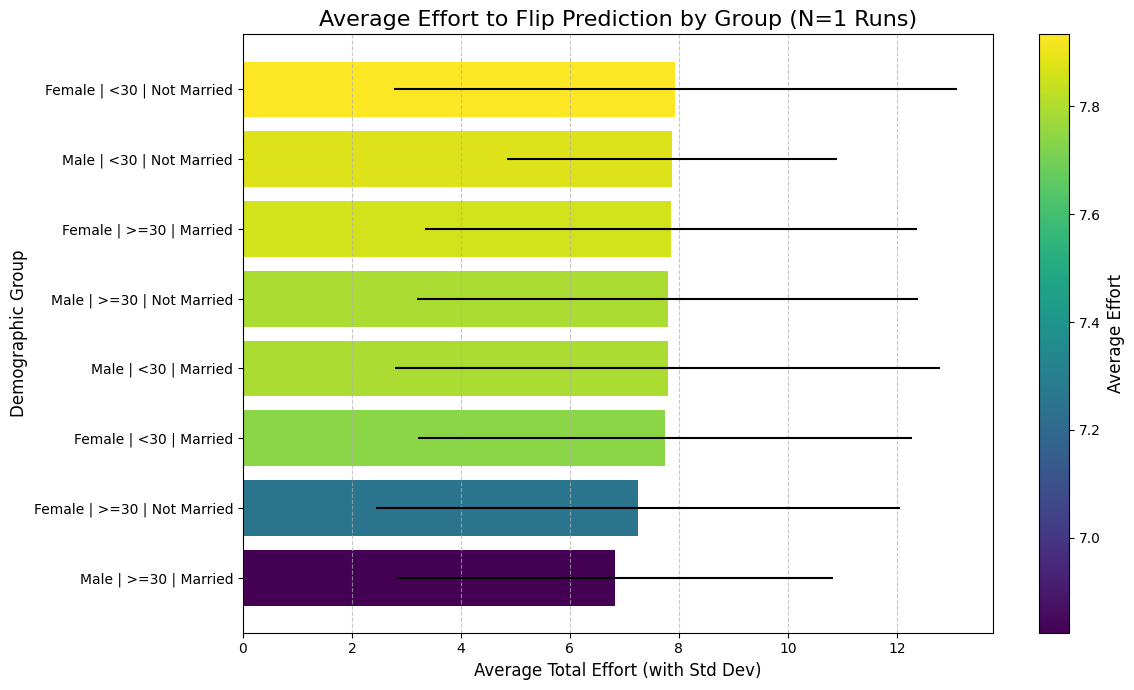

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# --- Sort and flip for bottom-up display ---
group_effort_summary.sort_values(by="Mean Effort", ascending=False, inplace=True)
group_effort_summary = group_effort_summary[::-1]

# --- Normalize for color mapping ---
norm = mcolors.Normalize(vmin=group_effort_summary['Mean Effort'].min(),
                         vmax=group_effort_summary['Mean Effort'].max())
cmap = cm.viridis
colors = cmap(norm(group_effort_summary['Mean Effort']))

# --- Create figure and axes ---
fig, ax = plt.subplots(figsize=(12, 7))

# --- Horizontal bar plot ---
bars = ax.barh(
    group_effort_summary['Group'],
    group_effort_summary['Mean Effort'],
    xerr=group_effort_summary['Std Effort'],
    color=colors
)

# --- Axis labels and grid ---
ax.set_title(f"Average Effort to Flip Prediction by Group (N={NUM_RUNS} Runs)", fontsize=16)
ax.set_xlabel("Average Total Effort (with Std Dev)", fontsize=12)
ax.set_ylabel("Demographic Group", fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# --- Add colorbar to the same figure ---
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy data for ScalarMappable
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Average Effort', fontsize=12)

plt.tight_layout()
plt.show()

## Gender Groups

In [ ]:
efforts_df = pd.DataFrame([
    {
        'SEX': r['SEX'],
        'AGE_GROUP': r['AGE_GROUP'],
        'MARRIAGE_GROUP': r['MARRIAGE_GROUP'],
        'effort': sum(r['feature_efforts'].values())
    }
    for r in results_list
])

print(efforts_df.groupby("SEX")["effort"].agg(['mean', 'std', 'count']))

            mean       std  count
SEX                              
Female  7.762378  4.746362    236
Male    7.407802  4.057236    208


In [ ]:
from scipy.stats import ttest_ind

female_efforts = efforts_df[efforts_df['SEX'] == 'Female']['effort']
male_efforts = efforts_df[efforts_df['SEX'] == 'Male']['effort']

t_stat, p_value = ttest_ind(female_efforts, male_efforts, equal_var=False)

print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.5f}")

T-statistic: 0.849, p-value: 0.39658


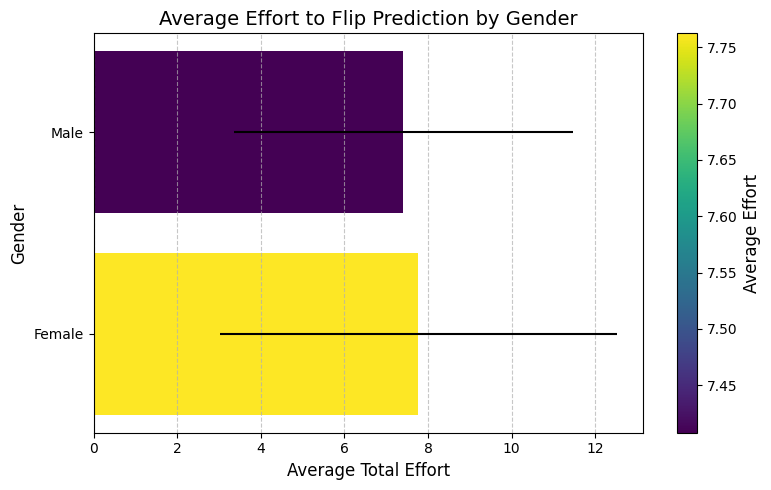

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd

# --- Recalculate mean/std from individual data ---
gender_summary_individual = efforts_df.groupby("SEX")["effort"].agg(['mean', 'std']).reset_index()
gender_summary_individual.rename(columns={'mean': 'Mean Effort', 'std': 'Std Effort'}, inplace=True)

# --- Normalize for gender colormap ---
norm = mcolors.Normalize(vmin=gender_summary_individual['Mean Effort'].min(),
                         vmax=gender_summary_individual['Mean Effort'].max())
colors = cm.viridis(norm(gender_summary_individual['Mean Effort']))

# --- Plot per gender ---
fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.barh(
    gender_summary_individual['SEX'],
    gender_summary_individual['Mean Effort'],
    xerr=gender_summary_individual['Std Effort'],
    color=colors
)

ax.set_title("Average Effort to Flip Prediction by Gender", fontsize=14)
ax.set_xlabel("Average Total Effort", fontsize=12)
ax.set_ylabel("Gender", fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add colorbar
sm = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Average Effort', fontsize=12)

plt.tight_layout()
plt.show()

/tmp/ipython-input-26-2484027282.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=efforts_df, x='effort', y='SEX', palette='viridis')


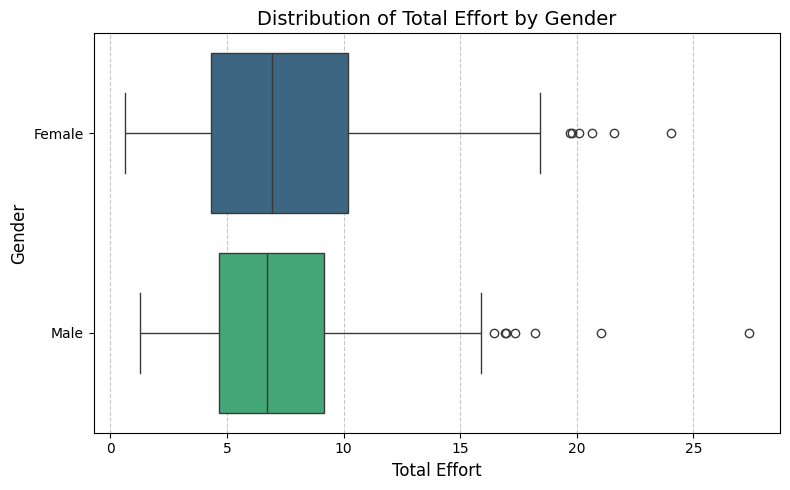

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=efforts_df, x='effort', y='SEX', palette='viridis')

plt.title("Distribution of Total Effort by Gender", fontsize=14)
plt.xlabel("Total Effort", fontsize=12)
plt.ylabel("Gender", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-27-1934035715.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=efforts_df, x='effort', y='SEX', palette='viridis', inner='box')


<Axes: xlabel='effort', ylabel='SEX'>

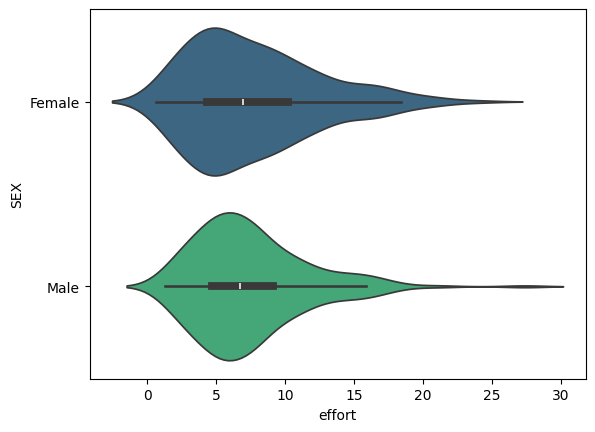

In [ ]:
sns.violinplot(data=efforts_df, x='effort', y='SEX', palette='viridis', inner='box')

<Axes: xlabel='effort', ylabel='SEX'>

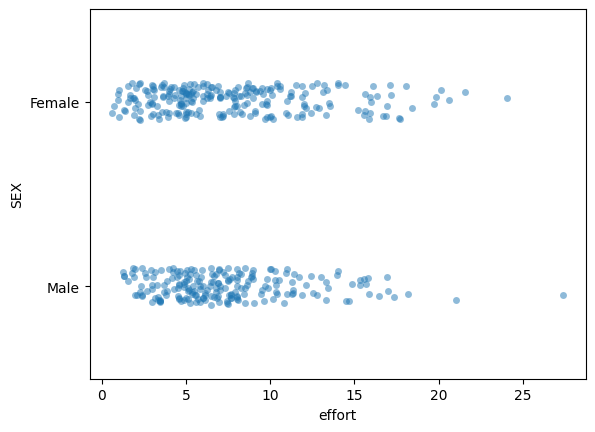

In [ ]:
sns.stripplot(data=efforts_df, x='effort', y='SEX', alpha=0.5, jitter=True)

## Heatmap

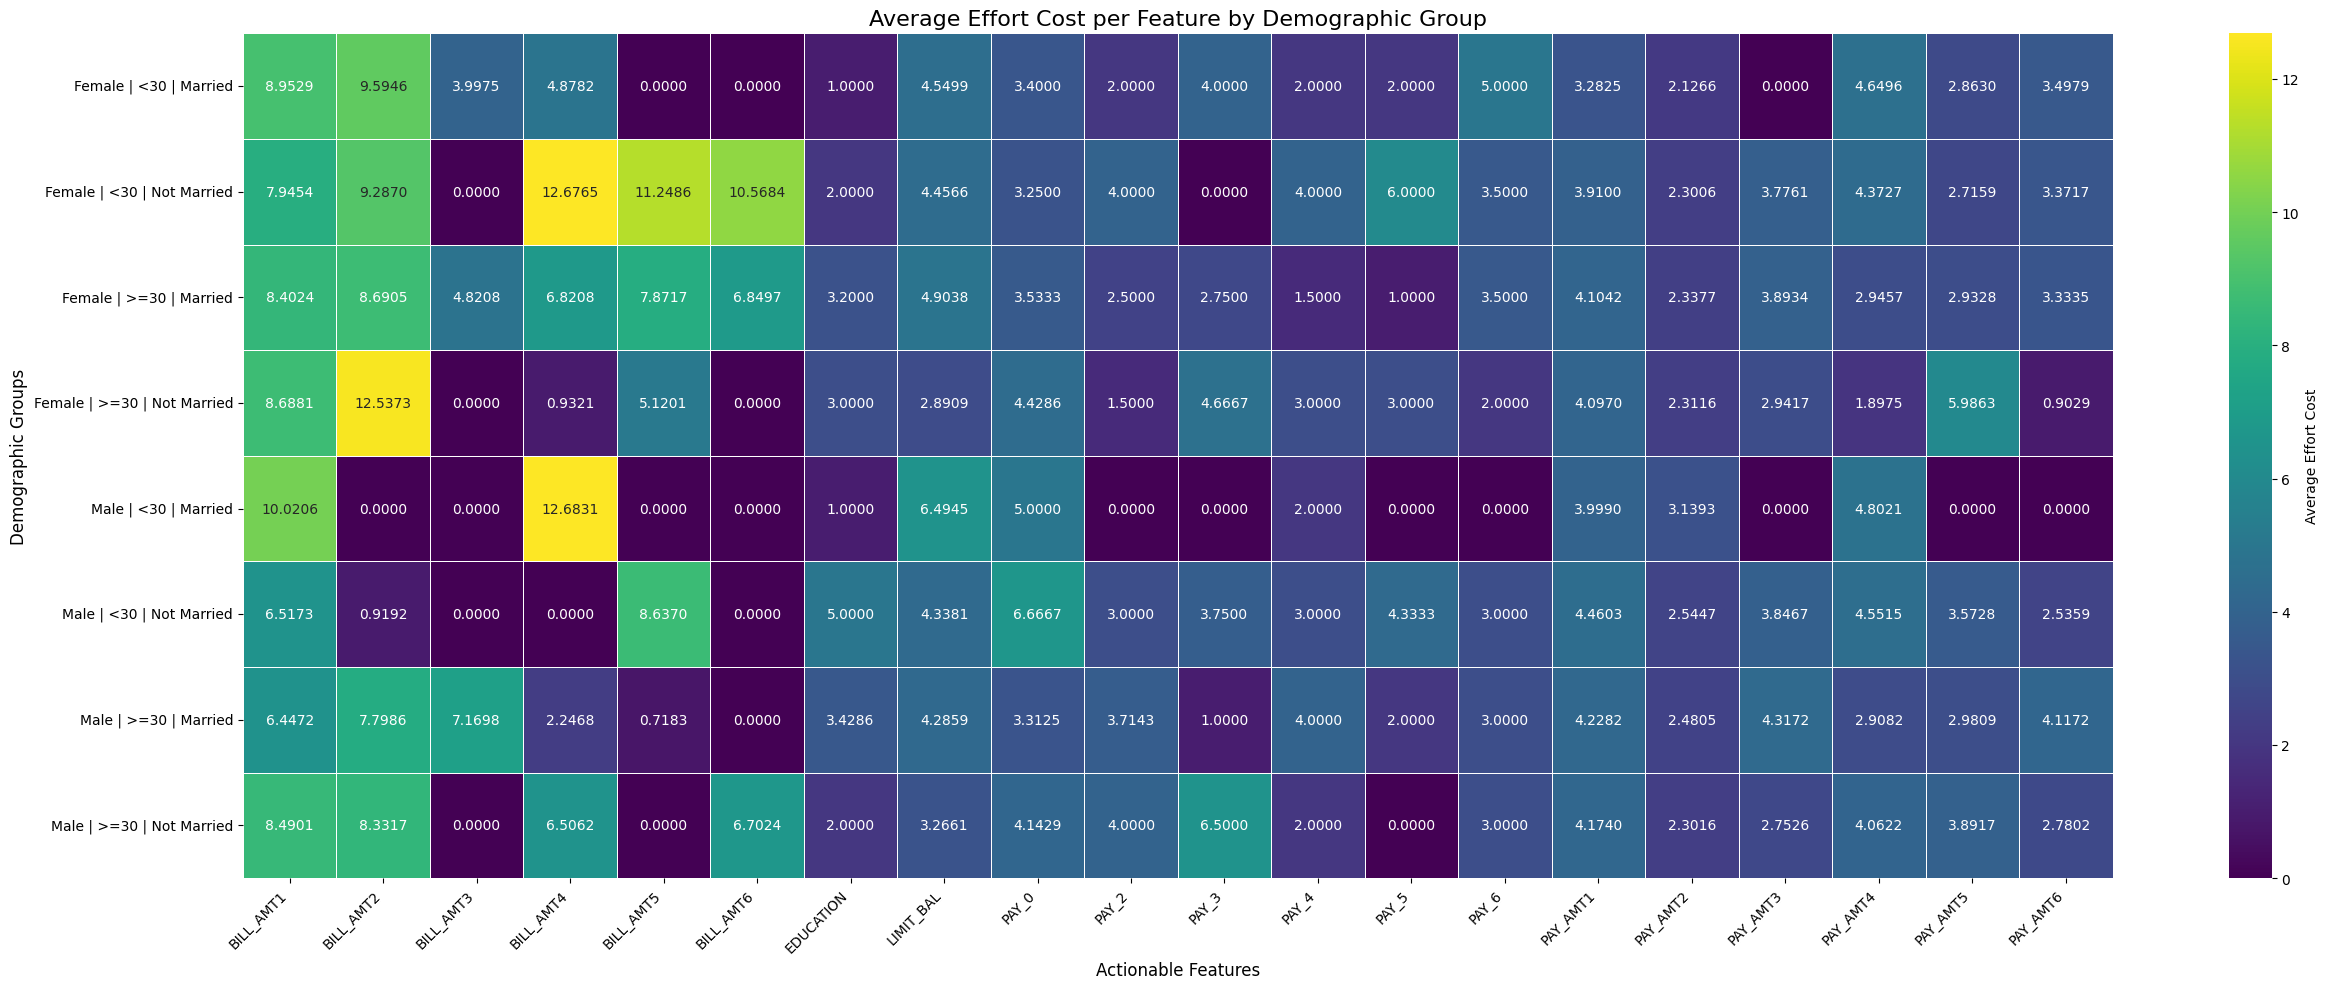

In [ ]:
# --- Heatmap: Feature Effort by Group ---
results_df = pd.DataFrame(results_list)

# Step 1–3: Demographics + Feature Efforts
demographics_df = results_df[['SEX', 'AGE_GROUP', 'MARRIAGE_GROUP']].reset_index(drop=True)
feature_efforts_df = pd.json_normalize(results_df['feature_efforts']).reset_index(drop=True)
wide_effort_df = pd.concat([demographics_df, feature_efforts_df], axis=1)

# Step 4: Melt to long format
effort_melted = wide_effort_df.melt(
    id_vars=['SEX', 'AGE_GROUP', 'MARRIAGE_GROUP'],
    var_name='Feature',
    value_name='Effort'
)
effort_melted['Group'] = effort_melted['SEX'] + ' | ' + effort_melted['AGE_GROUP'] + ' | ' + effort_melted['MARRIAGE_GROUP']

# Group and pivot
grouped_effort = effort_melted[effort_melted['Effort'] > 0].groupby(['Group', 'Feature'])['Effort'].mean().reset_index()
pivot_df = grouped_effort.pivot(index='Group', columns='Feature', values='Effort').fillna(0)
pivot_df = pivot_df.sort_index()

# Plot heatmap
plt.figure(figsize=(26, 10))
sns.heatmap(
    pivot_df, annot=True, fmt=".4f", cmap="viridis",
    linewidths=0.5, cbar_kws={'label': 'Average Effort Cost'}
)
plt.title("Average Effort Cost per Feature by Demographic Group", fontsize=16)
plt.xlabel("Actionable Features", fontsize=12)
plt.ylabel("Demographic Groups", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5 runs with all 444 predicted as default for each run

In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict
import random
import seaborn as sns
import matplotlib.pyplot as plt

# --- Configuration ---
NUM_RUNS = 5
group_effort_runs = defaultdict(list)
results_list = []

# --- Multiple Runs ---
for run in range(NUM_RUNS):
    print(f"Run {run+1}/{NUM_RUNS}")

    np.random.seed(run)
    random.seed(run)

    # --- Main Counterfactual Generation Loop ---

    # Identify denied applicants from the test set
    denied_mask = (y_pred == 1)

    X_sampled = X_test[denied_mask].copy()  # Creates an independent copy

    print(f"Generating counterfactuals for {len(X_sampled)} sampled instances...")

    # Before generating counterfactuals, ensure all features have consistent types
    for col in X_sampled.columns:
        X_sampled[col] = X_sampled[col].astype(df[col].dtype)  # Convert all to float for numerical operations

    # Then modify your main loop:
    for idx, instance in X_sampled.iterrows():
        try:
            cfs = dice_exp.generate_counterfactuals(
                query_instances=instance.to_frame().T,
                total_CFs=1,
                desired_class="opposite",
                features_to_vary=features_to_vary, # ADDED
                permitted_range=feature_ranges # ADDED
            )
            cf_df = cfs.cf_examples_list[0].final_cfs_df

            if cf_df is not None and not cf_df.empty:
                # Use the scaler from your preprocessing pipeline
                min_effort, feature_efforts = calculate_normalized_effort(
                    instance,
                    cf_df.iloc[0],
                    effort_costs,
                    scaler=best_pipeline.named_steps['preprocessor'].transformers_[0][1],  # Get the StandardScaler
                )

                if min_effort != float('inf'):
                    sex_label = 'Male' if instance['SEX'] == 1 else 'Female'
                    age_label = '>=30' if instance['AGE'] >= 30 else '<30'
                    marriage_label = 'Married' if instance['MARRIAGE'] == 1 else 'Not Married'
                    group_label = f"{sex_label} | {age_label} | {marriage_label}"

                    # Total effort aggregation
                    group_effort_runs[group_label].append(min_effort)

                    # Per-feature effort aggregation
                    results_list.append({
                        'SEX': sex_label,
                        'AGE_GROUP': age_label,
                        'MARRIAGE_GROUP': marriage_label,
                        'feature_efforts': feature_efforts
                    })
        except Exception as e:
            print(f"Run {run+1}, instance {idx}: {e}")

Run 1/5
Generating counterfactuals for 444 sampled instances...


100%|██████████| 1/1 [00:00<00:00,  2.30it/s]


Run 2/5
Generating counterfactuals for 444 sampled instances...


100%|██████████| 1/1 [00:00<00:00,  2.29it/s]


Run 3/5
Generating counterfactuals for 444 sampled instances...


100%|██████████| 1/1 [00:00<00:00,  2.46it/s]


Run 4/5
Generating counterfactuals for 444 sampled instances...


100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


Run 5/5
Generating counterfactuals for 444 sampled instances...


100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


## Subgroups

In [ ]:
# --- Summary Table: Total Effort by Group ---
group_effort_summary = pd.DataFrame([
    {
        'Group': group,
        'Mean Effort': np.mean(efforts),
        'Std Effort': np.std(efforts),
        'Count': len(efforts)
    }
    for group, efforts in group_effort_runs.items()
])
print(group_effort_summary)

                         Group  Mean Effort  Std Effort  Count
0      Female | >=30 | Married     7.735485    4.434690    580
1         Male | <30 | Married     7.196952    4.017561     45
2        Male | >=30 | Married     7.147126    4.161577    435
3    Male | >=30 | Not Married     7.412581    4.321494    300
4     Male | <30 | Not Married     7.656965    3.872528    260
5   Female | <30 | Not Married     7.233717    4.611348    280
6  Female | >=30 | Not Married     7.266830    4.281447    195
7       Female | <30 | Married     7.134206    3.954080    125


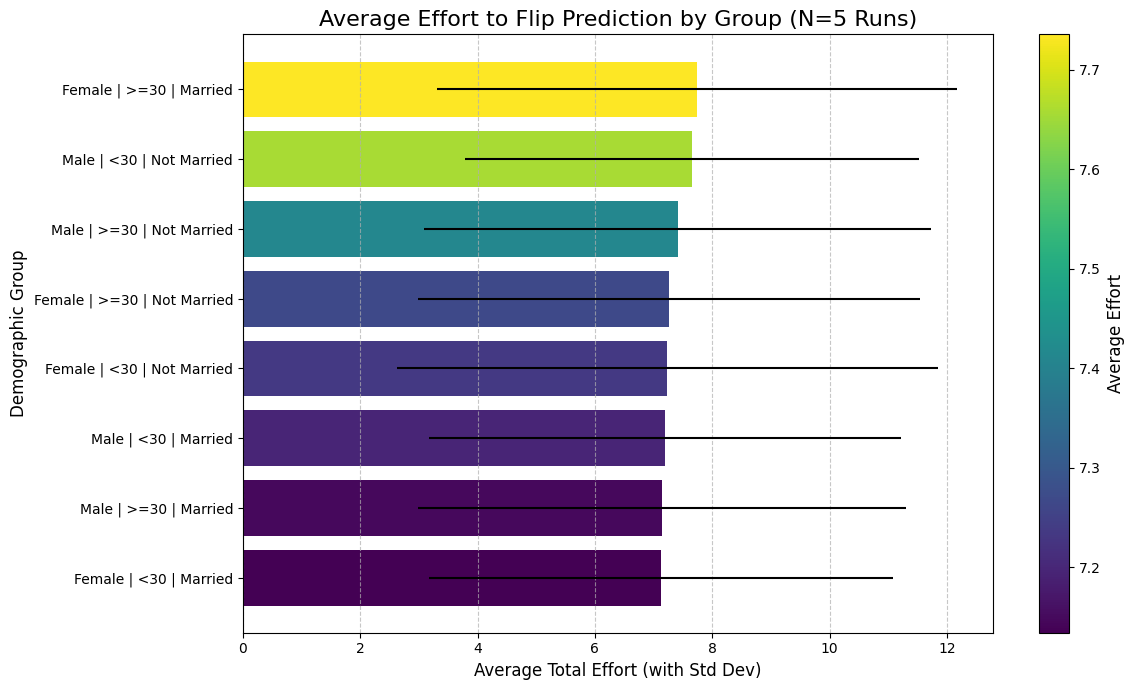

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# --- Sort and flip for bottom-up display ---
group_effort_summary.sort_values(by="Mean Effort", ascending=False, inplace=True)
group_effort_summary = group_effort_summary[::-1]

# --- Normalize for color mapping ---
norm = mcolors.Normalize(vmin=group_effort_summary['Mean Effort'].min(),
                         vmax=group_effort_summary['Mean Effort'].max())
cmap = cm.viridis
colors = cmap(norm(group_effort_summary['Mean Effort']))

# --- Create figure and axes ---
fig, ax = plt.subplots(figsize=(12, 7))

# --- Horizontal bar plot ---
bars = ax.barh(
    group_effort_summary['Group'],
    group_effort_summary['Mean Effort'],
    xerr=group_effort_summary['Std Effort'],
    color=colors
)

# --- Axis labels and grid ---
ax.set_title(f"Average Effort to Flip Prediction by Group (N={NUM_RUNS} Runs)", fontsize=16)
ax.set_xlabel("Average Total Effort (with Std Dev)", fontsize=12)
ax.set_ylabel("Demographic Group", fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# --- Add colorbar to the same figure ---
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy data for ScalarMappable
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Average Effort', fontsize=12)

plt.tight_layout()
plt.show()

## Gender Groups

In [ ]:
efforts_df = pd.DataFrame([
    {
        'SEX': r['SEX'],
        'AGE_GROUP': r['AGE_GROUP'],
        'MARRIAGE_GROUP': r['MARRIAGE_GROUP'],
        'effort': sum(r['feature_efforts'].values())
    }
    for r in results_list
])

print(efforts_df.groupby("SEX")["effort"].agg(['mean', 'std', 'count']))

            mean       std  count
SEX                              
Female  7.475279  4.413728   1180
Male    7.353315  4.139794   1040


In [ ]:
from scipy.stats import ttest_ind

female_efforts = efforts_df[efforts_df['SEX'] == 'Female']['effort']
male_efforts = efforts_df[efforts_df['SEX'] == 'Male']['effort']

t_stat, p_value = ttest_ind(female_efforts, male_efforts, equal_var=False)

print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.5f}")

T-statistic: 0.672, p-value: 0.50197


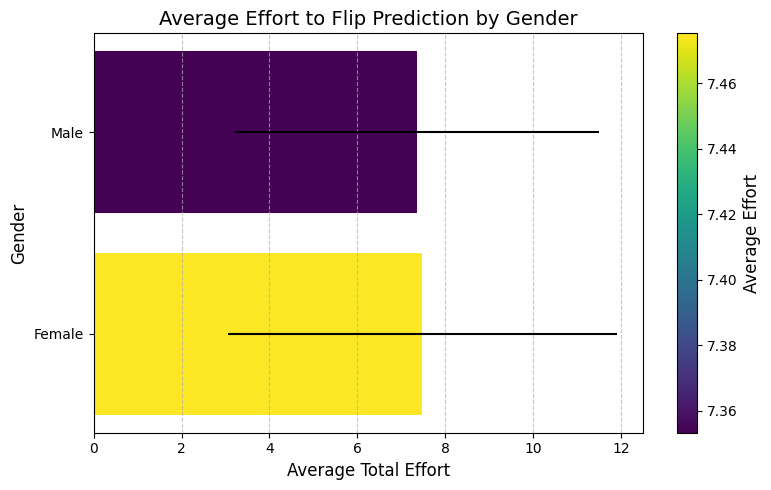

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd

# --- Recalculate mean/std from individual data ---
gender_summary_individual = efforts_df.groupby("SEX")["effort"].agg(['mean', 'std']).reset_index()
gender_summary_individual.rename(columns={'mean': 'Mean Effort', 'std': 'Std Effort'}, inplace=True)

# --- Normalize for gender colormap ---
norm = mcolors.Normalize(vmin=gender_summary_individual['Mean Effort'].min(),
                         vmax=gender_summary_individual['Mean Effort'].max())
colors = cm.viridis(norm(gender_summary_individual['Mean Effort']))

# --- Plot per gender ---
fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.barh(
    gender_summary_individual['SEX'],
    gender_summary_individual['Mean Effort'],
    xerr=gender_summary_individual['Std Effort'],
    color=colors
)

ax.set_title("Average Effort to Flip Prediction by Gender", fontsize=14)
ax.set_xlabel("Average Total Effort", fontsize=12)
ax.set_ylabel("Gender", fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add colorbar
sm = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Average Effort', fontsize=12)

plt.tight_layout()
plt.show()

/tmp/ipython-input-35-2484027282.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=efforts_df, x='effort', y='SEX', palette='viridis')


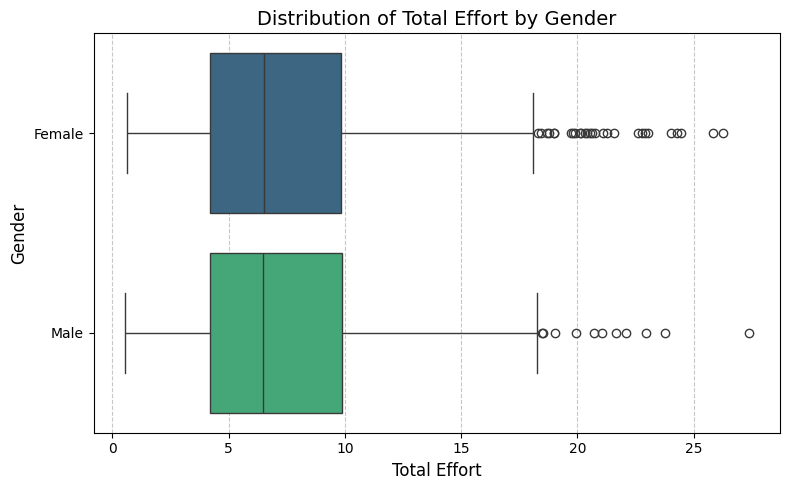

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=efforts_df, x='effort', y='SEX', palette='viridis')

plt.title("Distribution of Total Effort by Gender", fontsize=14)
plt.xlabel("Total Effort", fontsize=12)
plt.ylabel("Gender", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-36-1934035715.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=efforts_df, x='effort', y='SEX', palette='viridis', inner='box')


<Axes: xlabel='effort', ylabel='SEX'>

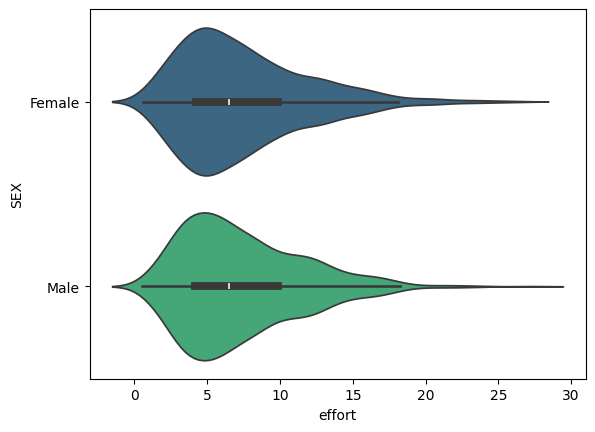

In [ ]:
sns.violinplot(data=efforts_df, x='effort', y='SEX', palette='viridis', inner='box')

<Axes: xlabel='effort', ylabel='SEX'>

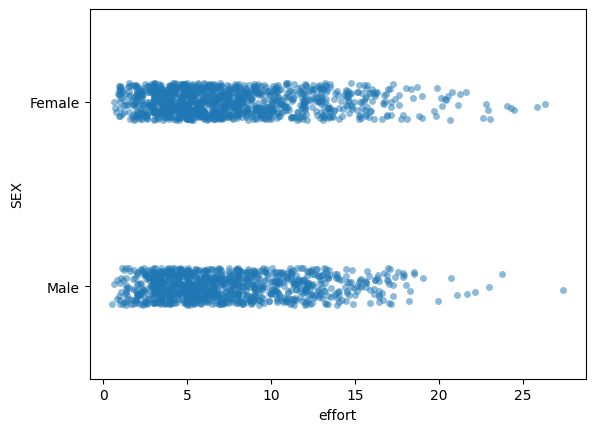

In [ ]:
sns.stripplot(data=efforts_df, x='effort', y='SEX', alpha=0.5, jitter=True)

## Heatmap

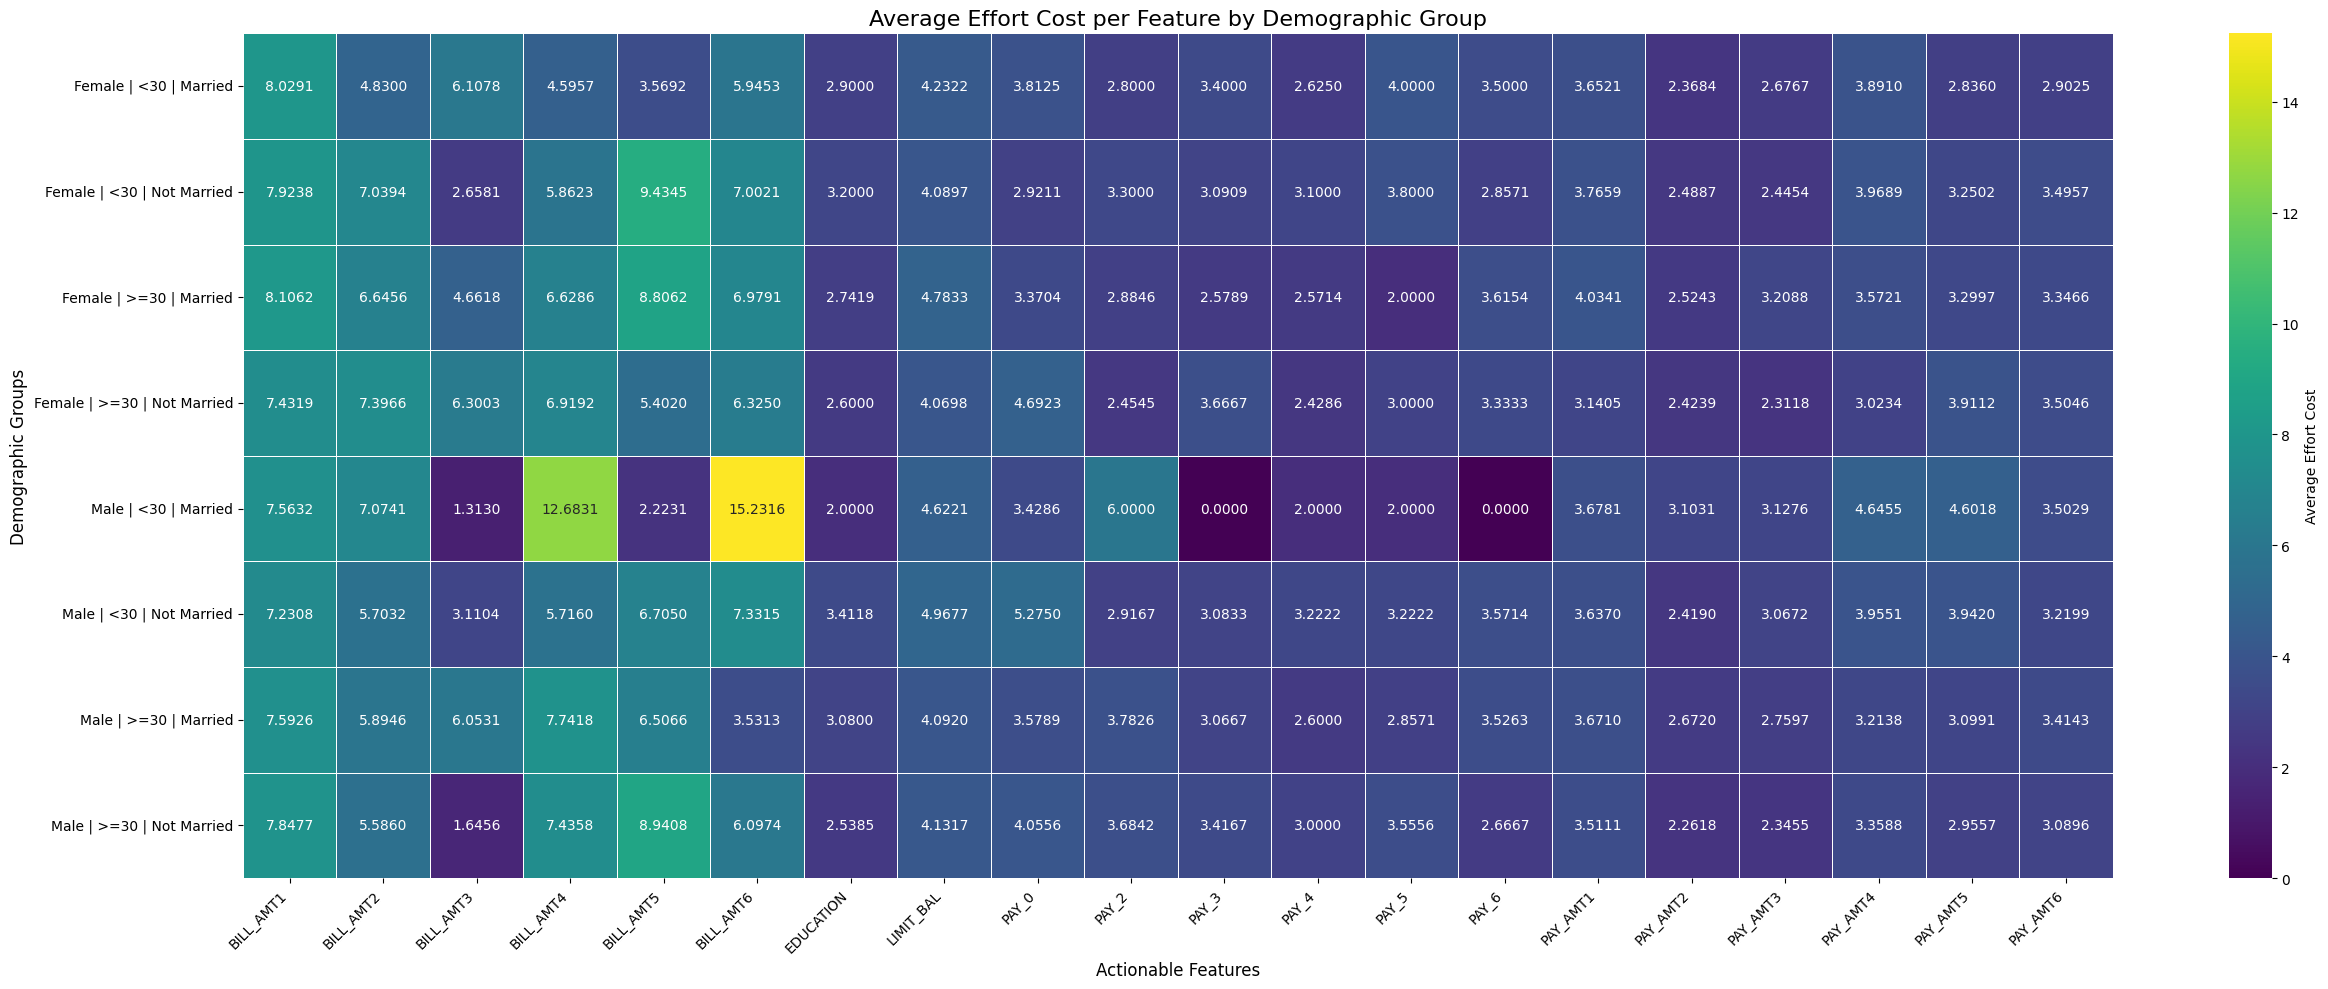

In [ ]:
# --- Heatmap: Feature Effort by Group ---
results_df = pd.DataFrame(results_list)

# Step 1–3: Demographics + Feature Efforts
demographics_df = results_df[['SEX', 'AGE_GROUP', 'MARRIAGE_GROUP']].reset_index(drop=True)
feature_efforts_df = pd.json_normalize(results_df['feature_efforts']).reset_index(drop=True)
wide_effort_df = pd.concat([demographics_df, feature_efforts_df], axis=1)

# Step 4: Melt to long format
effort_melted = wide_effort_df.melt(
    id_vars=['SEX', 'AGE_GROUP', 'MARRIAGE_GROUP'],
    var_name='Feature',
    value_name='Effort'
)
effort_melted['Group'] = effort_melted['SEX'] + ' | ' + effort_melted['AGE_GROUP'] + ' | ' + effort_melted['MARRIAGE_GROUP']

# Group and pivot
grouped_effort = effort_melted[effort_melted['Effort'] > 0].groupby(['Group', 'Feature'])['Effort'].mean().reset_index()
pivot_df = grouped_effort.pivot(index='Group', columns='Feature', values='Effort').fillna(0)
pivot_df = pivot_df.sort_index()

# Plot heatmap
plt.figure(figsize=(26, 10))
sns.heatmap(
    pivot_df, annot=True, fmt=".4f", cmap="viridis",
    linewidths=0.5, cbar_kws={'label': 'Average Effort Cost'}
)
plt.title("Average Effort Cost per Feature by Demographic Group", fontsize=16)
plt.xlabel("Actionable Features", fontsize=12)
plt.ylabel("Demographic Groups", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()